# Data Process

In [20]:
import collections as c
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

## Converting .txt file into pandas

In [21]:
ds = open('p1dataset2021.txt','rt')
ds = ds.read()

# seperates each individuals
ds = ds.split('\n')
temp = list()
df=list()

# creates each individual info in each row
for data in ds:
    df.append(data.split(' '))

# converting lists into pandas
df = pd.DataFrame(df)
df = df.drop([995])

# creating a same size of df for binary maxtrix X
X = pd.DataFrame().reindex_like(df)


# creating a df for keeping track of population
population = pd.DataFrame(df[2])
population = population.rename(columns={2:'population'})
ppl = np.unique(population)

# creating a df for keeping track of gender
genderDf = pd.DataFrame(df[1])
genderDf = genderDf.rename(columns={1:'gender'})
gender = np.unique(genderDf)

df

,0,1,2,3,4,5,6,7,8,9,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,HG01879,1,ACB,G,G,T,T,A,A,C,...,T,A,T,A,A,T,T,T,G,A
1,HG01880,2,ACB,A,A,T,T,A,G,C,...,G,C,T,G,A,T,C,T,G,G
2,HG01881,2,ACB,A,A,T,T,A,A,G,...,G,C,T,G,A,T,C,T,G,G
3,HG01882,1,ACB,A,A,T,C,A,A,G,...,G,A,T,G,A,T,C,T,G,G
4,HG01883,2,ACB,G,A,T,C,G,A,C,...,G,C,T,G,A,T,C,T,G,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,NA20361,2,ASW,G,G,T,T,A,G,C,...,G,A,T,G,A,T,C,T,G,G
991,NA20362,1,ASW,G,A,T,T,A,G,C,...,G,A,T,G,A,T,C,T,G,G
992,NA20364,2,ASW,A,A,G,C,G,G,G,...,G,A,T,G,A,T,C,T,G,G
993,NA20412,2,ASW,G,G,G,T,A,G,C,...,G,C,T,G,A,T,C,T,G,G


## Creating a row for each columns.mode()

In [23]:
mode = df.mode().head(1)
mode[0][0] = 'mode'

mode

,0,1,2,3,4,5,6,7,8,9,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,mode,1,YRI,G,A,T,C,A,G,G,...,T,C,C,G,A,T,C,T,G,G


## Based on the mode row, this cell marks each row's mutation as 1 and the rest as 0 in each columns and returns Binary Matrix X

In [24]:
from tqdm.auto import tqdm

for i in tqdm(range(3, len(df.columns)), position = 0,leave=False):
    X[i] = (df[i] == mode[i][0])

X = X.replace({True: 0, False: 1})
X = X.drop(columns = [0, 1, 2])
X.columns = range(X.shape[1])

X


,0,1,2,3,4,5,6,7,8,9,...,10091,10092,10093,10094,10095,10096,10097,10098,10099,10100
0,0,1,0,1,0,1,1,0,0,0,...,0,1,1,1,0,0,1,0,0,1
1,1,0,0,1,0,0,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,1,0,1,0,0,1,1,1,0,...,1,1,1,0,0,0,0,0,0,0
991,0,0,0,1,0,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0,0
992,1,0,1,0,1,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
993,0,1,1,1,0,0,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0


## Standardizing the input X

In [25]:
X = X.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perfroming dimention reductions via PCA

In [26]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf = pd.concat([principalDf, population, genderDf], axis = 1)


finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,population,gender
0,10.656075,-1.526003,8.051975,-1.258889,ACB,1
1,26.561622,4.988273,-1.684483,-7.616717,ACB,2
2,20.212847,1.598595,-2.506919,-4.326915,ACB,2
3,-0.609554,-1.706019,7.230047,1.060497,ACB,1
4,7.819458,0.887135,-5.697021,-2.165787,ACB,2
...,...,...,...,...,...,...
990,18.756369,-0.268635,-4.635396,-3.129383,ASW,2
991,16.550770,0.324511,4.995757,-2.724589,ASW,1
992,17.945936,0.035777,-3.963284,-7.758711,ASW,2
993,12.517898,-1.244876,-3.759779,-5.337114,ASW,2


## Q(b)(20 points) 
We will examine the first 2 principal components of X. These components contain lots of
information about our data set. Create a scatter plot with each of the 995 rows of X projected onto
the first two principal components. In other words, the horizontal axis should be V1, the vertical axis
V2, and each individual should be projected onto the subspace spanned by V1 and V2. Your plot
must use a different color for each population and include a legend.

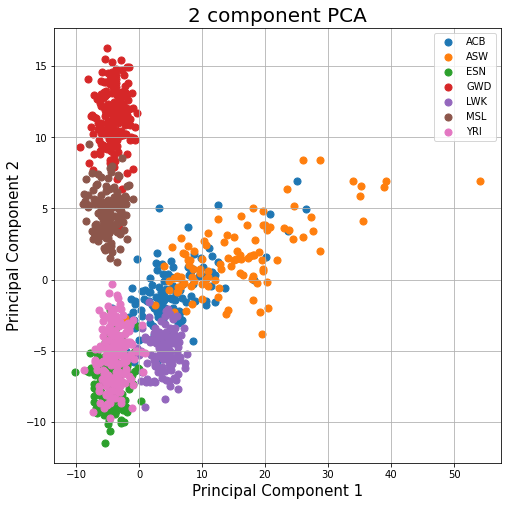

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


for person in ppl:
    indicesToKeep = finalDf['population'] == person
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               s = 50)
ax.legend(ppl)
ax.grid()

## Q(c)(25 points)

In two sentences, list 1 or 2 basic facts about the plot created in part (b). Can you
interpret the first two principal components? What aspects of the data do the first two principal
components capture? Hint: think about history and geography.

## My response:

A basic fact about the plot created: the geographic location plays a big role in these clusters.

Reason:
from the plot we can see two clearly distinguishable clusters, cluster1(GWD, MSL) and cluster2(ACB, ASW, ESN, YRI, LWK). 

From Principal Component 1 perspective:
GWD, MSL, YRI, and ESN fall in the range(-10, 0). With its geography, it makes sense for range(-10,0) because these people are located in Africa. 

LWK and most parts of ACB fall into range(0,10); and finally ASW and partial ACB fall into range(10,50). Their means are away from the groups in range(-10,0) since some are located in America and some are located in southern America.

Hence I would say that Principal Component 1 can be interpreted as:
set Africa as origin, and based on the distance we can group people into different categories.

As for Principal Component 2 perspective: 
I don't really see a meaning for it. One thing I can tell from this plot is that-Since the axes are ranked in order of importance, differences along the Principal Component 1 axis are more important than differences along the Principal Component 2 axis. If we take MSL, YRI, and ASW and roughly assume their means for example, we can tell that YRI is more different from ASW than MSL


## Q(d) (20 points) 
We will now examine the third principal component of X. Create another scatter plot with
each individual projected onto the subspace spanned by the first and third principal components.
After plotting, play with different labeling schemes (with labels derived from the meta-data) to
explain the clusters that you see. Your plot must include a legend.

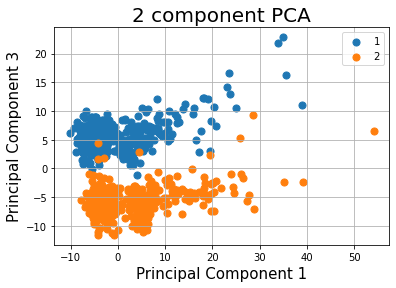

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


for sex in gender:
    indicesToKeep = finalDf['gender'] == sex
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 3'],
               s = 50)

ax.legend(gender)
ax.grid()

## Explaining the cluster that what I see
From the gender perspective (1=male, 2=female), we can clearly distinguish clusters with top and bottom clusters.

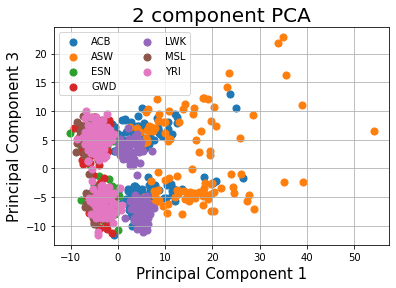

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


for person in ppl:
    indicesToKeep = finalDf['population'] == person
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 3'],
               s = 50)
ax.legend(ppl, ncol = 2)
ax.grid()

## Explaining the cluster that what I see
Since we have the prior knowledge of using gender, we can say that populations are not clear enough to distinguish different clusters.

## Q(e) (10 points) 
Something should have popped out at you in the plot above. In one sentence, what
information does the third principal component capture?

## My response:
Clearly, Principal Component 3 captures the gender feature.

## Q(I)
Can you uncover what information is captured in the fourth principal component of X?

## My response:
We can see two distinguishable clusters here. LWK forms a cluster while the rest forms another cluster. My best guess is that Kanya is the only population across the South sphere, while the rest of the population are all in the North sphere. Hence Principal Component 4 captures half-sphere. (I am pretty sure that I am wrong but this is my best guess)


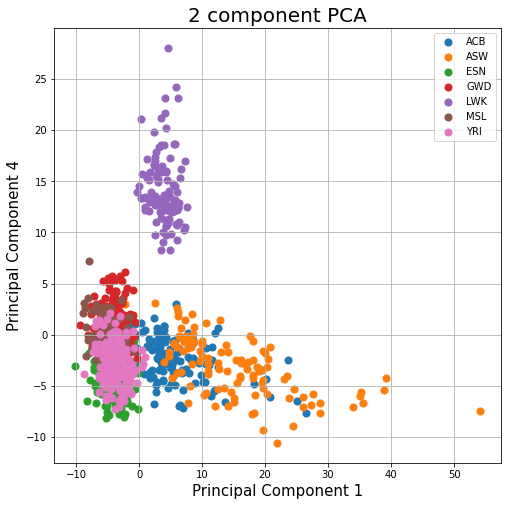

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


for person in ppl:
    indicesToKeep = finalDf['population'] == person
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 4'],
               s = 50)
ax.legend(ppl)
ax.grid()

## Q(f) (20 points) 
In this part, you will inspect the third principal component. Plot the nucleobase index vs
the absolute value of the third principal component. What do you notice? What’s a possible
explanation? Hint: think about chromosomes.

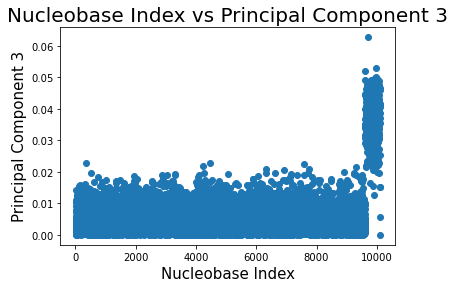

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Nucleobase Index', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('Nucleobase Index vs Principal Component 3', fontsize = 20)
ax.scatter(np.linspace(1,10101,num = 10101), abs(pca.components_[2]))

## My response:
From the plot we can see that the y values have higher in x range(9500-10101) than range(0-9500). My best guess is that since Principal Component 3 captures gender features, the nucleobases in x range(9500-10101) are responsible for the 'Y' chromosomes(which female has XX while male has XY).

## Q(g)
For this problem we simplified our dataset by capturing all deviations from the mode value with an
indicator variable. This loses some information relative to the original data set. How would you
create a real-valued matrix Y suitable for PCA analysis such that there is a bijection between our
input data (minus the first three columns) and Y? The matrix Y should be a useful input to PCA.
Explain the reasoning behind your choice of Y. Your answer to this question should not take more
than a few sentences.

## My response:
Prof. Shi introduced Onehotencoding and mapping categories into numerical features(which may cause undesired results since they become comparable) in the class. Here I tried both methods:

1) mapping each category to its own number(Now the categories can be compared, however, in this case we don't want this to happen.)
Z = df.replace({'G':0, 'T':1,'A':2, 'C':3})

2) Using Onehotencoding by running pandas.get_dummies function (which will cost us more memories since it produces more columns).
Y = pd.get_dummies(Y)

Both produce similar results.

## Using Onehotencoding method

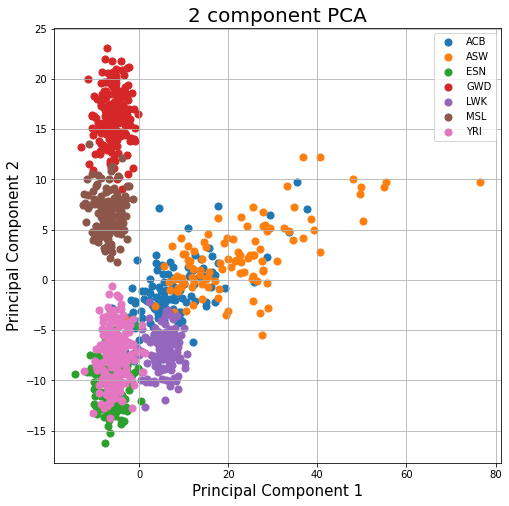

In [40]:
Y = df.drop(columns = [0, 1, 2])
Y = pd.get_dummies(Y)
Y = scaler.fit_transform(Y)

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(Y)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf = pd.concat([principalDf, population, genderDf], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


for person in ppl:
    indicesToKeep = finalDf['population'] == person
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               s = 50)
ax.legend(ppl)
ax.grid()


## Q(H)
Perform PCA on the matrix Y from part (g). Recreate the plot from part (b). What added value (if
any) does this more complex representation add?

## My response:
I don't see significant differences from Q(b) in this case. Because they are related to information on genes segregated by population, I don’t see what extra value such complex representation will add to the dataset, but in both ways we can avoid losing information at least. 


## Using mapping method

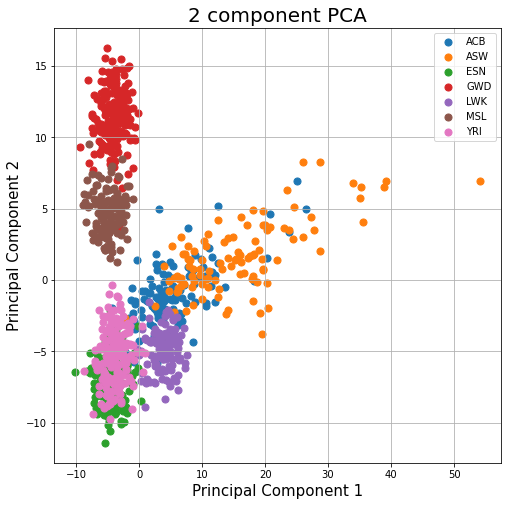

In [39]:
Z = df.replace({'G':0, 'T':1,'A':2, 'C':3})
Z = Z.drop(columns = [0, 1, 2])
Z.columns = range(Z.shape[1])
Z = scaler.fit_transform(Z)

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(Z)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf = pd.concat([principalDf, population, genderDf], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


for person in ppl:
    indicesToKeep = finalDf['population'] == person
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               s = 50)
ax.legend(ppl)
ax.grid()


## Q(J)
The provided dataset represents approximately 0.6% of the dataset found at the top of this
directory:
http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/supporting/hd_genotype_chip/. What
other information can you uncover from this much larger file? For this question we encourage you to
look at populations beyond Africa. You will notice that the file is a compressed .vcf le, you may want
to look into installing vcftools to work with the file.

I could download it but couldn't open it. I did try to find alternatives but my PC wasn't that powerful to plot it. Some other links that might help with this question. https://www.internationalgenome.org/faq/which-populations-are-part-your-study/